# <font color='teal'> <b> STEMFIE-X Christmas edition </b></font>

## <font color='purple'> <b> Create your own cookie cutter with stamp</b></font>

## <font color='teal'> <b> Template</b></font>

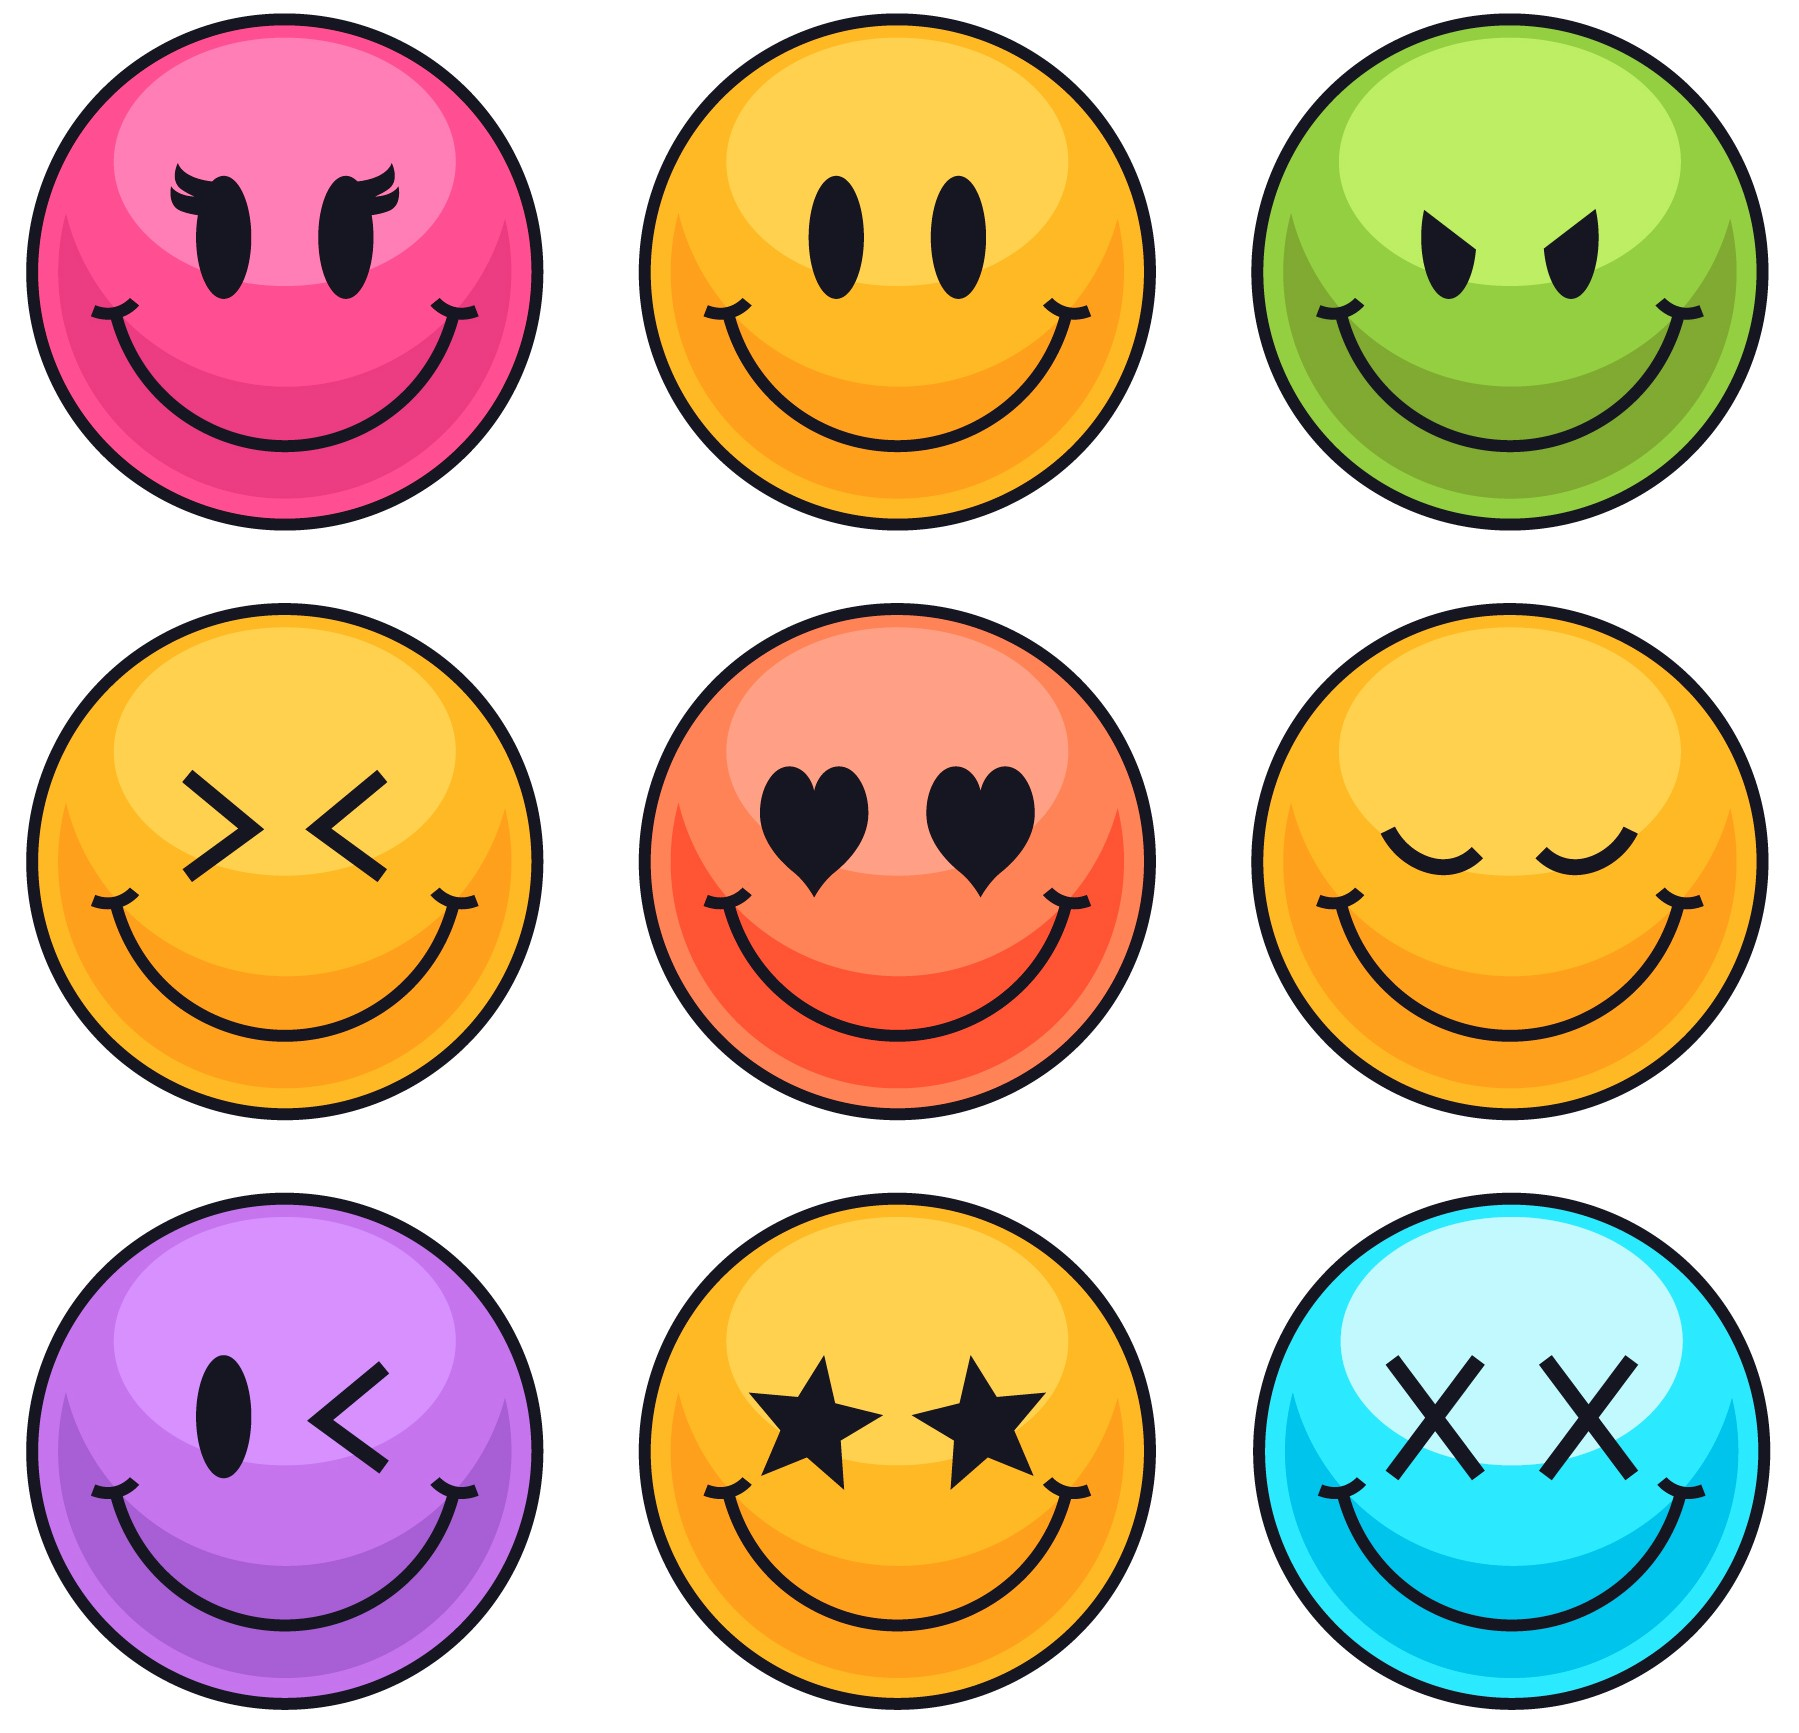

In [2]:
from IPython.display import Image
Image(filename='./img/christmas_special/10019903.jpg', width=400)

## <font color='teal'> <b> Design and Python script </b></font>

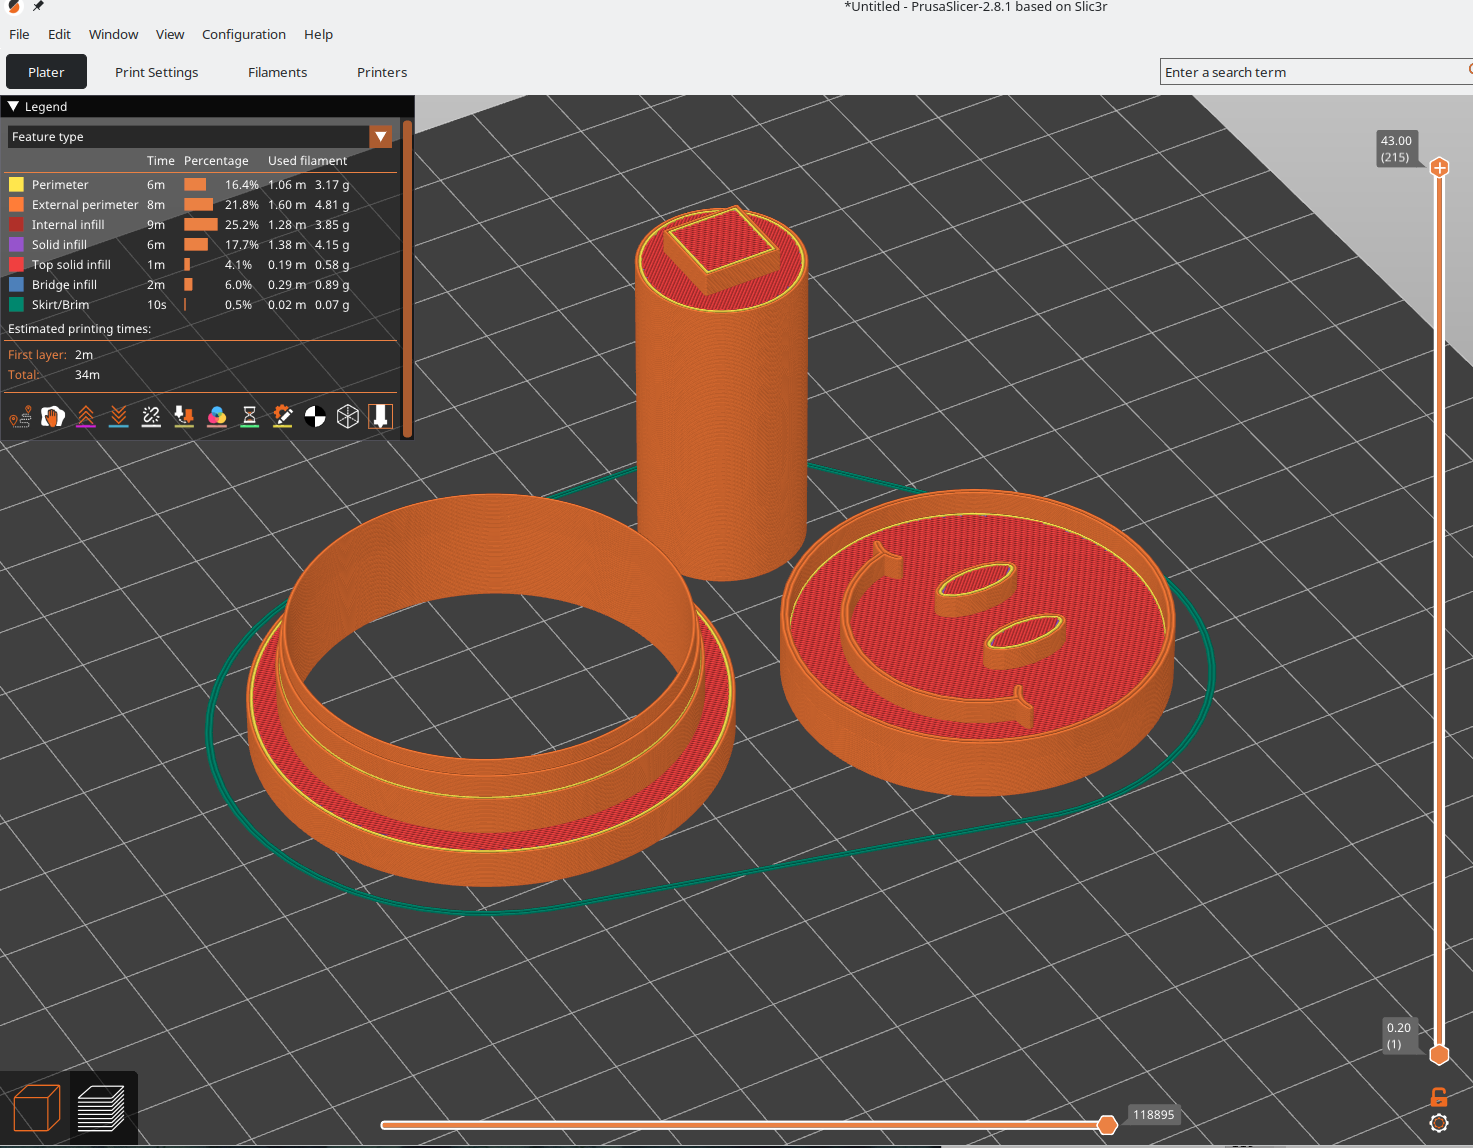

In [4]:
Image(filename='./img/christmas_special/vychechtany_keks.png', width=600)

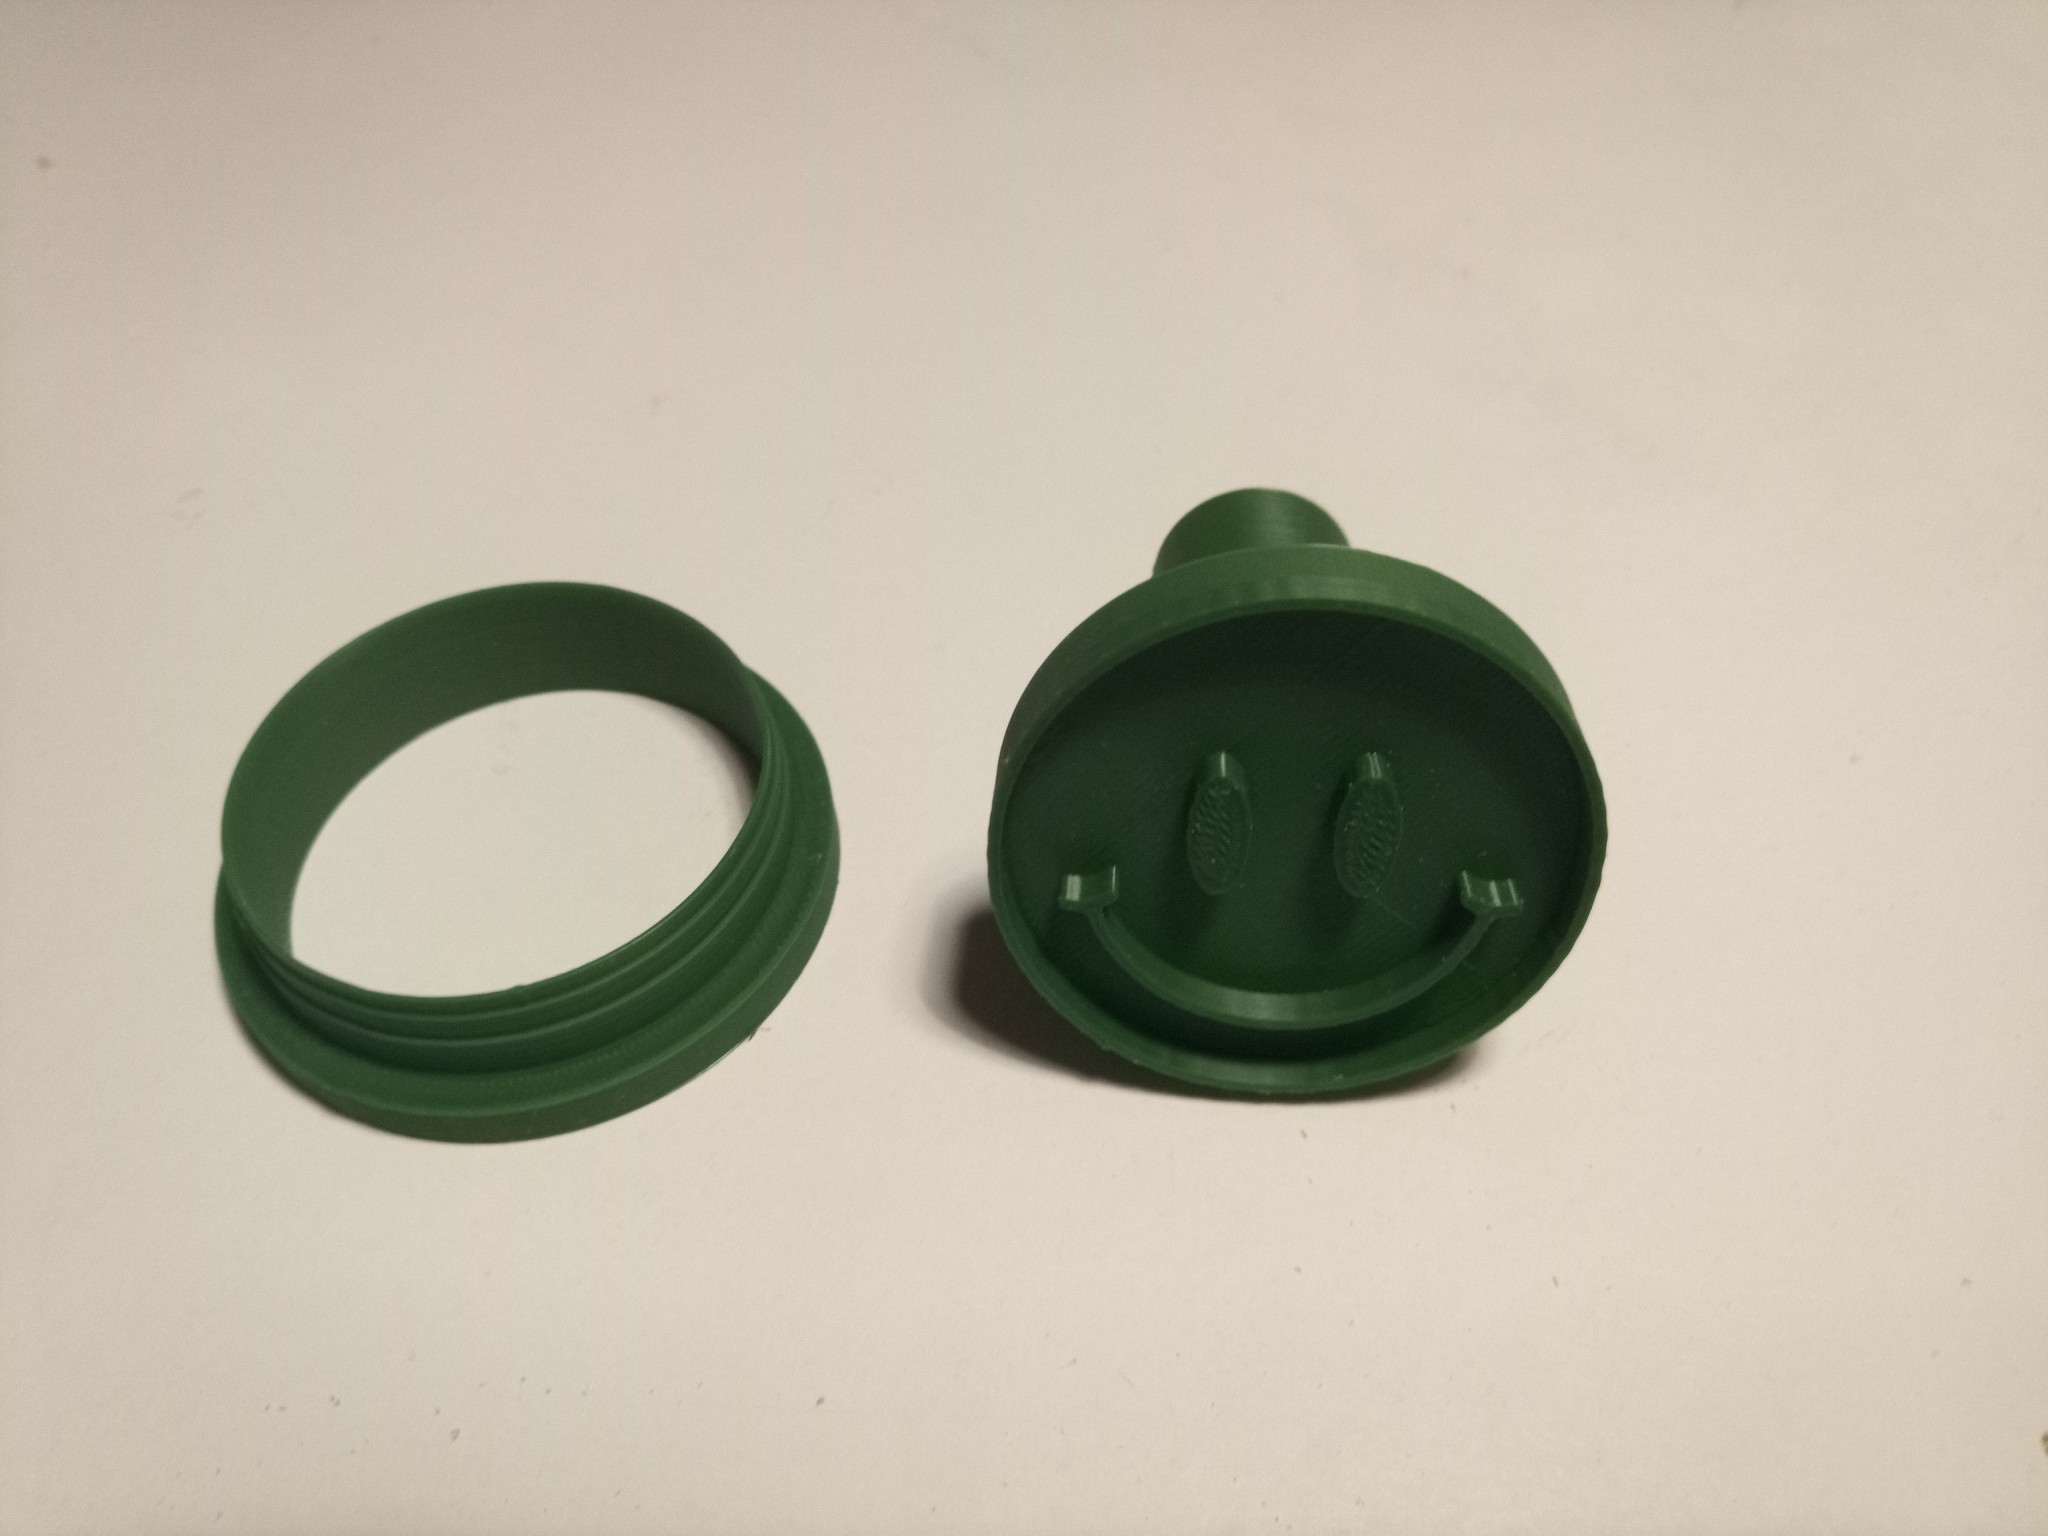

In [5]:
Image(filename='./img/christmas_special/IMG_20241215_214951_356.jpg', width=600)

In [ ]:
'''
Podklady - SVG subor konvertovany do DXF, vsetky ciary musia byt prevedene 
na obrysy pomocou funkcie Stroke to Path

Oblasti obsahujuce v sebe ine objekty musia byt exportovane samostatne
a poskladan0 dokopy az v cadquery, algoritmus pre extrude nevie v takomto
pripade rozhodnut, co ma byt vyplnene
'''
import cadquery as cq
from cadquery import exporters

file_okraj  = 'razitko_01_okraj.dxf'
file_vnutro = 'razitko_01_vnutro.dxf'


#-----------------------------------------------------------------------
stl_name = 'razitko_01.stl'

# vonkajsi obrys ramu
# urcenie stredu formicky z rozmeru vonkajsieho kruhu
vv = (
    cq.importers.importDXF(file_okraj)
    .val() 
    .CenterOfBoundBox()
)

# nacitanie okraja a posun do stredu suradnicovej sustavy
r1 = (
    cq.importers.importDXF(file_okraj)
   .translate(-vv)
   .extrude(3)
)

# nacitanie vyplne a posun do stredu
r2 = (
    cq.importers.importDXF(file_vnutro)
    .translate(-vv)
    .extrude(3)
)

r1 = r1.union(r2).translate([0,0,5])
#vv = r1.val().CenterOfBoundBox()
#r1 = r1.move(-vv)

d0 = 45.6/2
r3 = (cq
       .Workplane('XY')
       .cylinder(5, 45.6/2 )
       .translate([0, 0, 2.5])
       )

r1 = r1.union(r3)
     
b1 = (cq
       .Workplane('XY')
       .box(10,10,10 )
       .translate([0, 0, -2])
       )

r1 = r1.union(b1)
r1 = r1.cut(b1)

exporters.export(r1, stl_name)

#-----------------------------------------------------------------------
# vyrezavatko
d0 = d0 + 0.25

c0 = (cq
       .Workplane('XY')
       .cylinder(15, d0 )
       .translate([0, 0, 15/2])
       )


c1 = (cq
       .Workplane('XY')
       .cylinder(15, d0 + 0.5 )
       .translate([0, 0, 15/2])
       )
       
c2 = (cq
       .Workplane('XY')
       .cylinder(13, d0 + 1 )
       .translate([0, 0, 13/2])
       )

c3 = (cq
       .Workplane('XY')
       .cylinder(10, d0 + 1.5 )
       .translate([0, 0, 10/2])
       )
       
c4 = (cq
       .Workplane('XY')
       .cylinder(5, d0 + 5 )
       .translate([0, 0, 2.5])
       )

c1 = c1.union(c2)
c1 = c1.union(c3)
c1 = c1.union(c4)

c1 = c1.cut(c0)

exporters.export(c1, 'vyrezavatko.stl')

#=======================================================================
# rucka

b2 = (cq
       .Workplane('XY')
       .box(10,10,10 )
       .translate([0, 0, 45-7])
       )

cc =  (cq
       .Workplane('XY')
       .cylinder(40, 10)
       .translate([0, 0, 20])
       )

cc = cc.union(b2)
exporters.export(cc, 'rucka.stl')

## <font color='teal'> <b> We bake cookies ...</b></font>

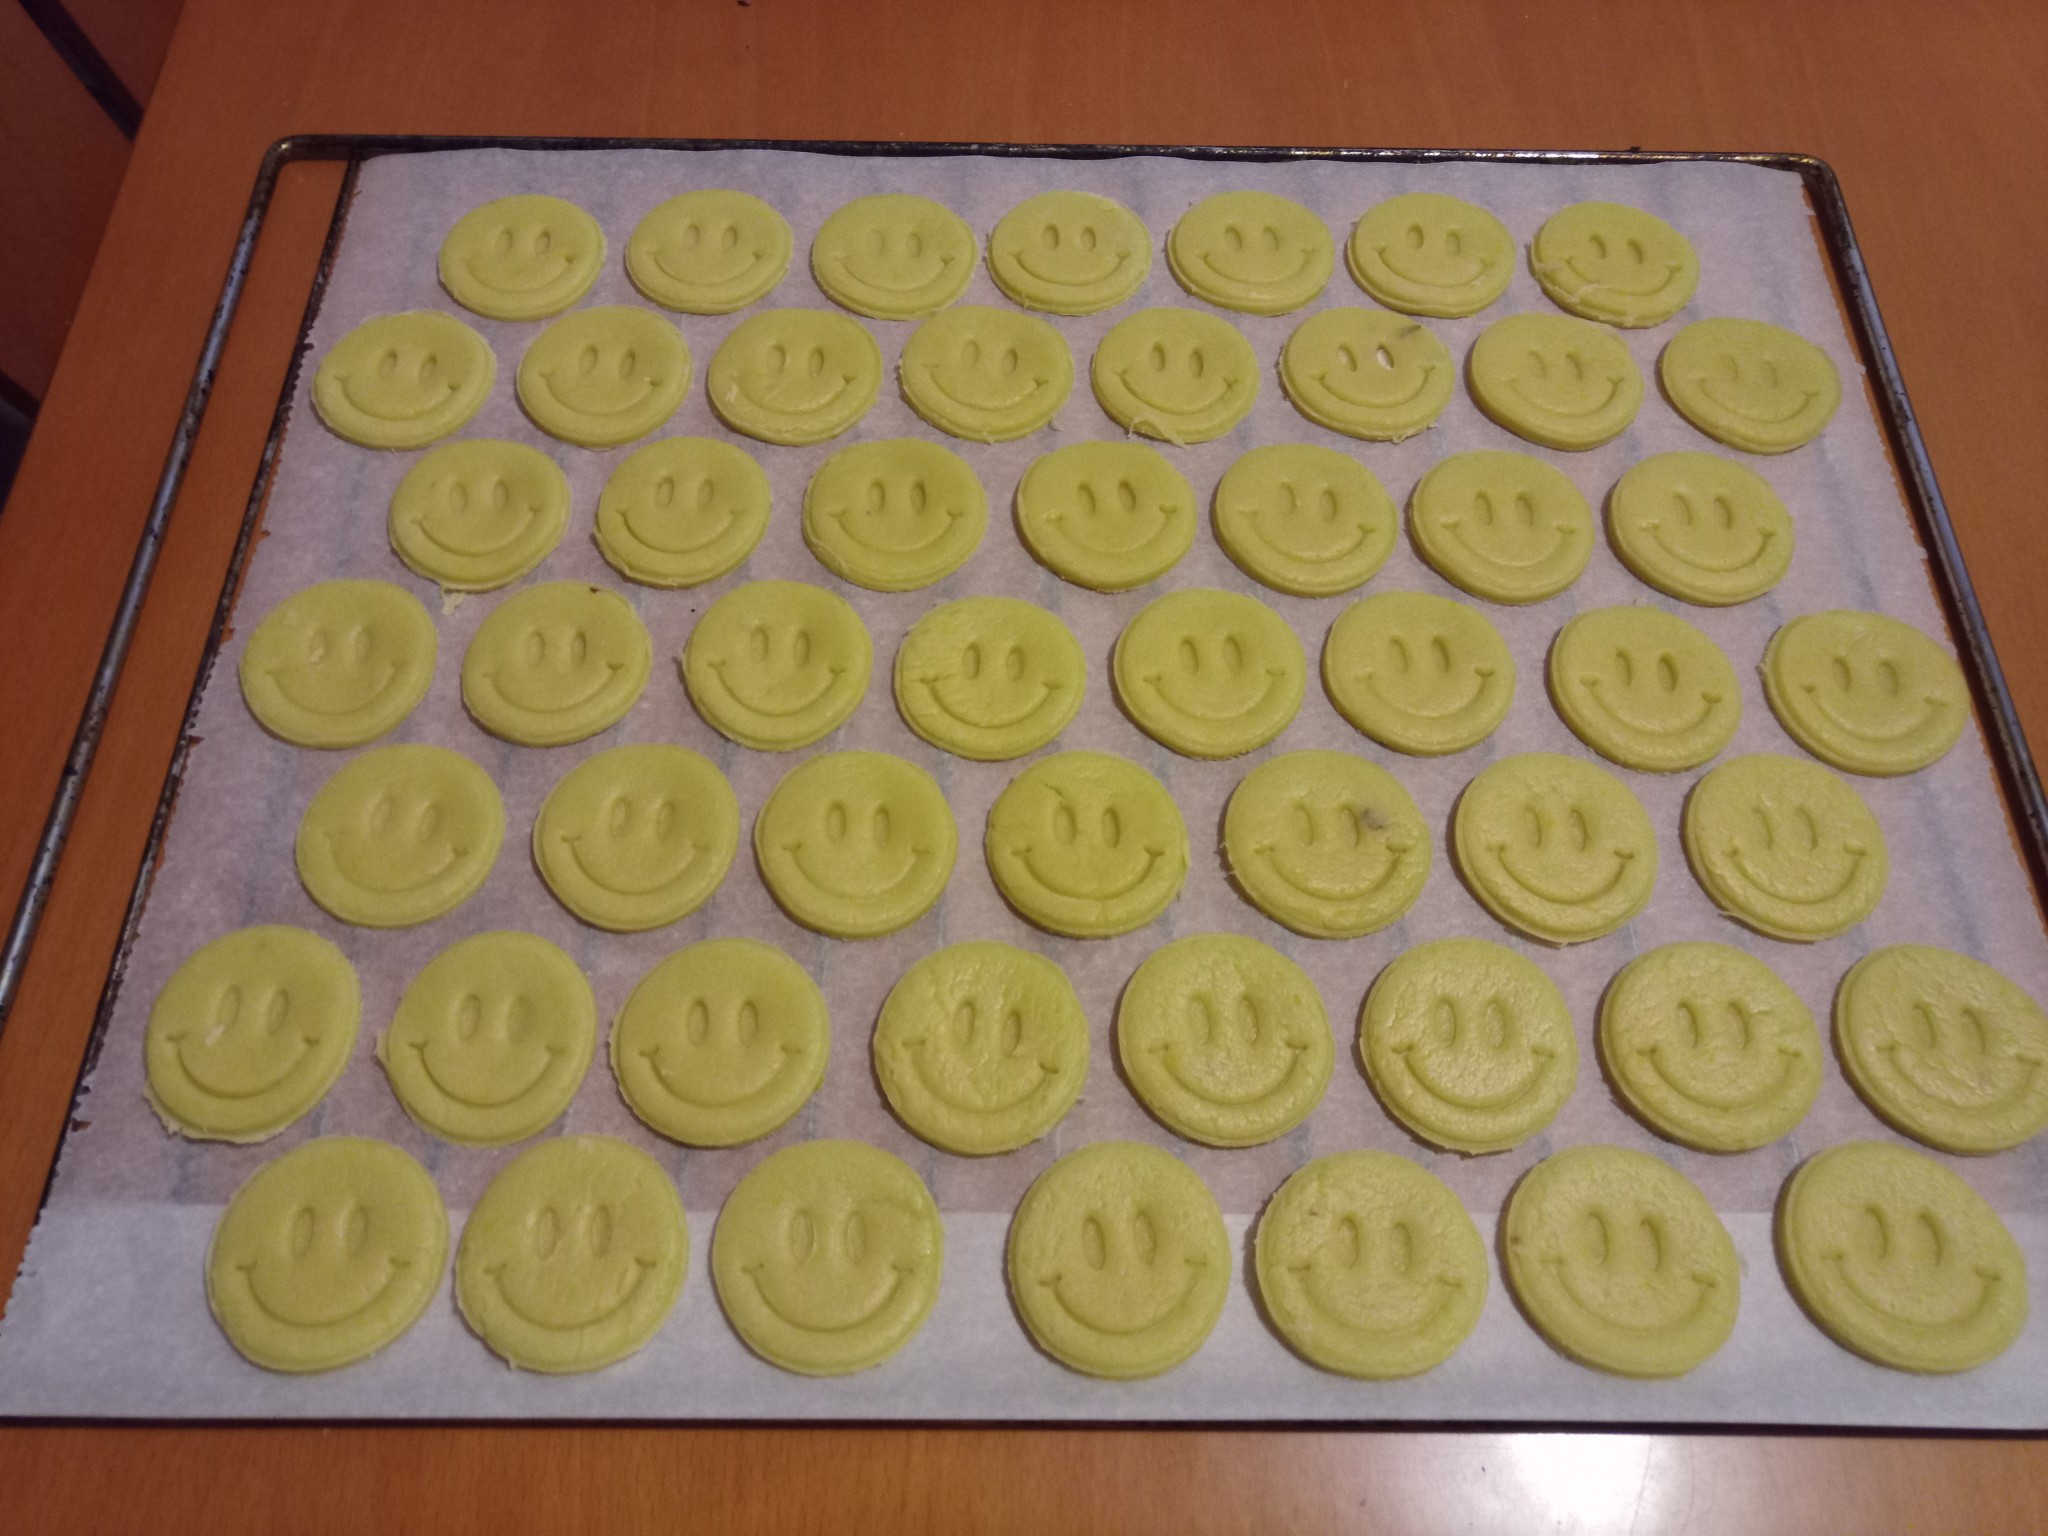

In [6]:
Image(filename='./img/christmas_special/IMG_20241217_190221_052.jpg', width=600)